In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# License: MIT

In [3]:
%matplotlib inline

## Packages

In [4]:
import numpy as np
import scipy as scipy
import scipy.linalg as linalg

import matplotlib.pyplot as plt

import warnings

# Computational Activity 2

## Part one: Velocity potential function

The velocity potential for uniform flow around a sphere at the origin is given by
$$ \Phi(\mathbf{r}) = cx + \frac{ca^3x}{2(x^2+y^2+z^2)^{3/2}}.$$
Let $a=1$.

In [5]:
def Phi(r,c):
    x=r[0]
    y=r[1]
    z=r[2]
    Phi = c*x + (c*x)/(2*(x**2+y**2+z**2)**(3/2))
    return Phi

Create mesh grid

In [6]:
xs = np.linspace(-2, 2, 101)
ys = np.linspace(-2, 2, 101)
zs = np.linspace(-2, 2, 101)

XX, YY, ZZ = np.meshgrid(xs, ys, zs)

Calculate for different values of $c$.

In [7]:
Phi_c05 = Phi(np.array([XX,YY,ZZ]),0.5)
Phi_c1 = Phi(np.array([XX,YY,ZZ]),1)
Phi_c2 = Phi(np.array([XX,YY,ZZ]),2)

C:\Users\quinncr\AppData\Local\Temp\ipykernel_28332\370729006.py:5: RuntimeWarning: invalid value encountered in divide
  Phi = c*x + (c*x)/(2*(x**2+y**2+z**2)**(3/2))


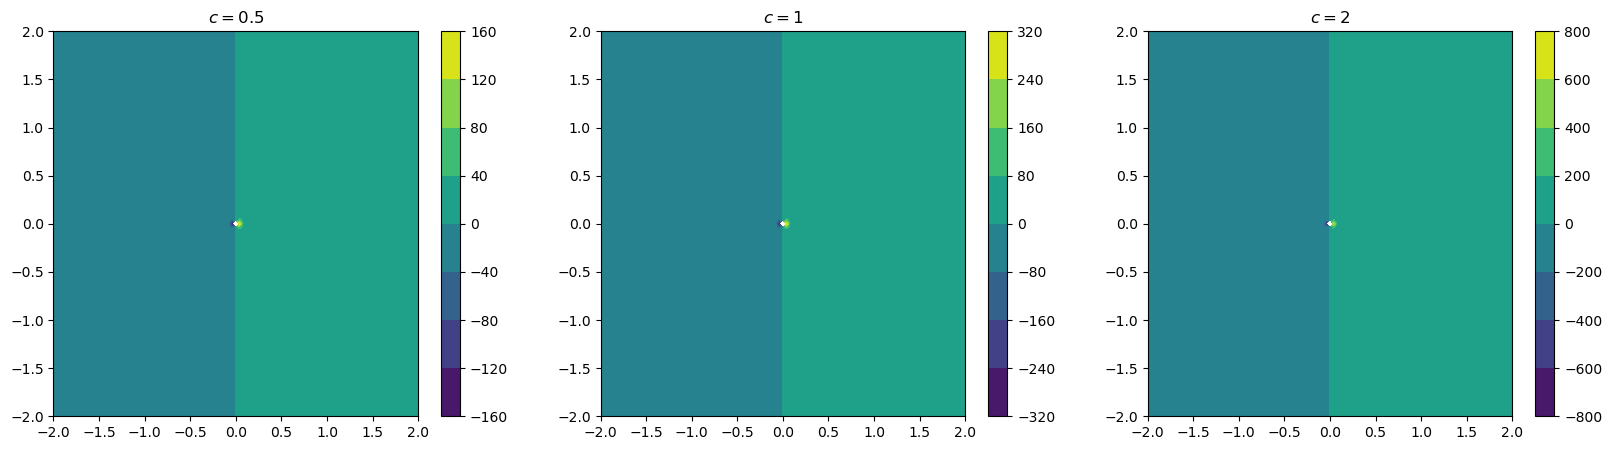

In [8]:
ind_z0 = 50

fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1, 3)

ax1 = fig.add_subplot(gs[0, 0])
cmap = ax1.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],Phi_c05[:,:,ind_z0])
plt.title('$c=0.5$')
fig.colorbar(cmap)

ax2 = fig.add_subplot(gs[0, 1])
cmap = ax2.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],Phi_c1[:,:,ind_z0])
plt.title('$c=1$')
fig.colorbar(cmap)

ax3 = fig.add_subplot(gs[0, 2])
cmap = ax3.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],Phi_c2[:,:,ind_z0])
plt.title('$c=2$')
fig.colorbar(cmap)

plt.show()

In [9]:
# mask out center values
for ii in np.arange(0,xs.shape[0]):
    for jj in np.arange(0,ys.shape[0]):
        for kk in np.arange(0,zs.shape[0]):
            if xs[ii]**2+ys[jj]**2+zs[kk]**2<0.1:
                Phi_c05[jj,ii,kk] = np.NaN
                Phi_c1[jj,ii,kk] = np.NaN
                Phi_c2[jj,ii,kk] = np.NaN

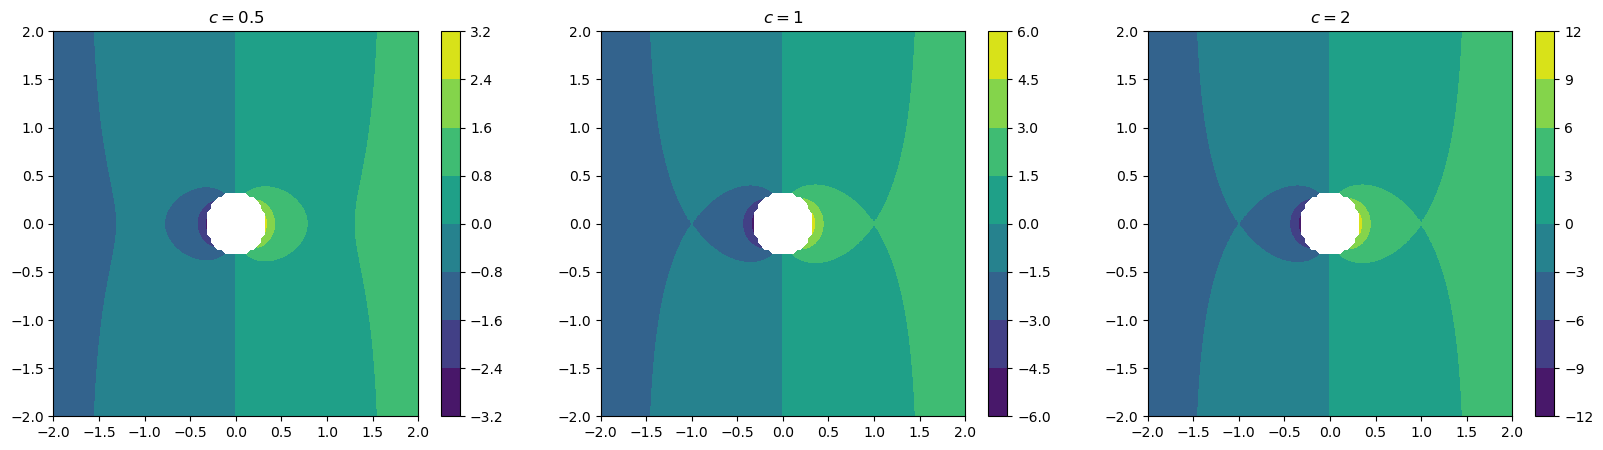

In [10]:
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1, 3)

ax1 = fig.add_subplot(gs[0, 0])
cmap = ax1.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],Phi_c05[:,:,ind_z0])
plt.title('$c=0.5$')
fig.colorbar(cmap)

ax2 = fig.add_subplot(gs[0, 1])
cmap = ax2.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],Phi_c1[:,:,ind_z0])
plt.title('$c=1$')
fig.colorbar(cmap)

ax3 = fig.add_subplot(gs[0, 2])
cmap = ax3.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],Phi_c2[:,:,ind_z0])
plt.title('$c=2$')
fig.colorbar(cmap)

plt.show()

## Part two: Velocity field and streamlines

Velocity vector is defined as
$$ \mathbf{u}=\nabla\Phi=\begin{bmatrix}\frac{\partial\Phi}{\partial x} \\ \frac{\partial\Phi}{\partial y} \\ \frac{\partial\Phi}{\partial z}\end{bmatrix}  =
\begin{bmatrix} c+\frac{ca^3}{2(x^2+y^2+z^2)^{3/2}}-\frac{3}{2}\frac{ca^3x^2}{(x^2+y^2+z^2)^{5/2}} \\ -\frac{3}{2}\frac{ca^3xy}{(x^2+y^2+z^2)^{5/2}} \\ -\frac{3}{2}\frac{ca^3xz}{(x^2+y^2+z^2)^{5/2}}\end{bmatrix}.$$

In [11]:
def velocity(r,c):
    x=r[0]
    y=r[1]
    z=r[2]
    
    u = c + c/(2*(x**2+y**2+z**2)**(3/2)) - 3/2*(c*x**2)/(x**2+y**2+z**2)**(5/2) 
    v = -3/2*(c*x*y)/(x**2+y**2+z**2)**(5/2) 
    w = -3/2*(c*x*z)/(x**2+y**2+z**2)**(5/2) 
    U = np.array([u,v,w])
    return U

C:\Users\quinncr\AppData\Local\Temp\ipykernel_28332\725010879.py:6: RuntimeWarning: divide by zero encountered in divide
  u = c + c/(2*(x**2+y**2+z**2)**(3/2)) - 3/2*(c*x**2)/(x**2+y**2+z**2)**(5/2)
C:\Users\quinncr\AppData\Local\Temp\ipykernel_28332\725010879.py:6: RuntimeWarning: invalid value encountered in divide
  u = c + c/(2*(x**2+y**2+z**2)**(3/2)) - 3/2*(c*x**2)/(x**2+y**2+z**2)**(5/2)
C:\Users\quinncr\AppData\Local\Temp\ipykernel_28332\725010879.py:7: RuntimeWarning: invalid value encountered in divide
  v = -3/2*(c*x*y)/(x**2+y**2+z**2)**(5/2)
C:\Users\quinncr\AppData\Local\Temp\ipykernel_28332\725010879.py:8: RuntimeWarning: invalid value encountered in divide
  w = -3/2*(c*x*z)/(x**2+y**2+z**2)**(5/2)


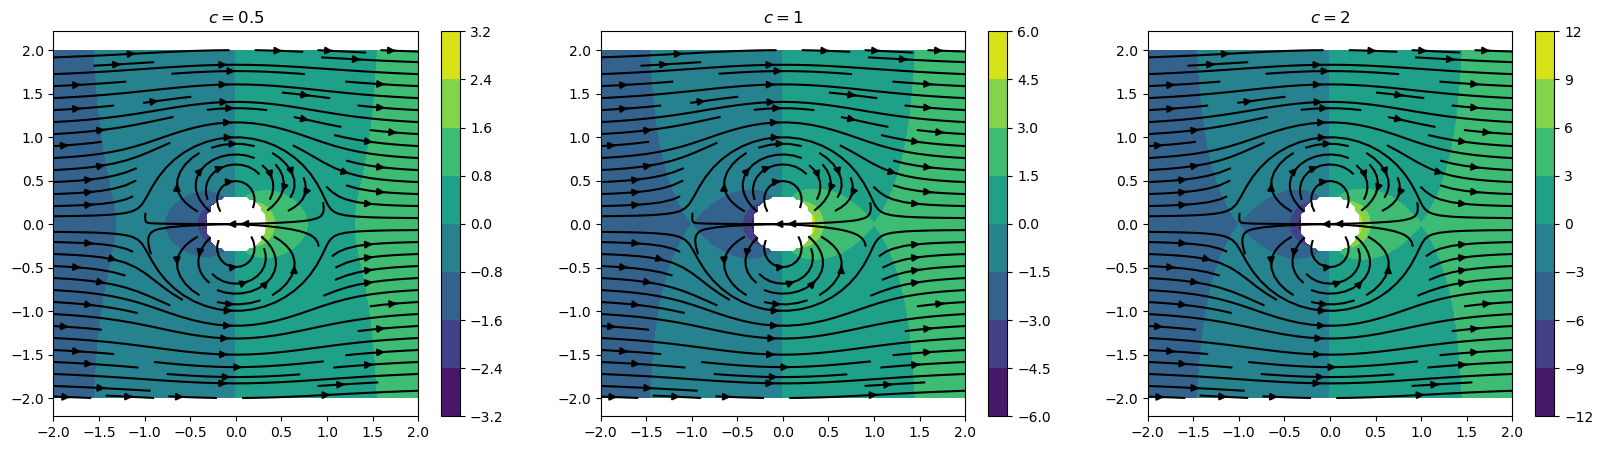

In [12]:
# calculate velocity at each point in mesh for different values of c
U05 = velocity([XX,YY,ZZ],0.5)
U1 = velocity([XX,YY,ZZ],1)
U2 = velocity([XX,YY,ZZ],2)

# extract velocity components
u05 = U05[0,:,:,ind_z0]
v05 = U05[1,:,:,ind_z0]

u1 = U1[0,:,:,ind_z0]
v1 = U1[1,:,:,ind_z0]

u2 = U2[0,:,:,ind_z0]
v2 = U2[1,:,:,ind_z0]

# plot streamlines over velocity potential
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1, 3)

ax1 = fig.add_subplot(gs[0, 0])
cmap = ax1.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],Phi_c05[:,:,ind_z0])
fig.colorbar(cmap)
ax1.streamplot(XX[:,:,ind_z0],YY[:,:,ind_z0],u05,v05,color='k');
plt.title('$c=0.5$')

ax2 = fig.add_subplot(gs[0, 1])
cmap = ax2.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],Phi_c1[:,:,ind_z0])
fig.colorbar(cmap)
ax2.streamplot(XX[:,:,ind_z0],YY[:,:,ind_z0],u1,v1,color='k');
plt.title('$c=1$')

ax3 = fig.add_subplot(gs[0, 2])
cmap = ax3.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],Phi_c2[:,:,ind_z0])
fig.colorbar(cmap)
ax3.streamplot(XX[:,:,ind_z0],YY[:,:,ind_z0],u2,v2,color='k');
plt.title('$c=2$')

plt.show()

## Part three: Stagnation points

Find the points at which the velocity $\mathbf{u}=\mathbf{0}$.

In [13]:
stag1_c05 = scipy.optimize.fsolve(lambda r:velocity(r,0.5),[0.1,0.1,0.1])
stag2_c05 = scipy.optimize.fsolve(lambda r:velocity(r,0.5),[-0.1,-0.1,-0.1])

stag1_c1 = scipy.optimize.fsolve(lambda r:velocity(r,1),[0.1,0.1,0.1])
stag2_c1 = scipy.optimize.fsolve(lambda r:velocity(r,1),[-0.1,-0.1,-0.1])

stag1_c2 = scipy.optimize.fsolve(lambda r:velocity(r,2),[0.1,0.1,0.1])
stag2_c2 = scipy.optimize.fsolve(lambda r:velocity(r,2),[-0.1,-0.1,-0.1])

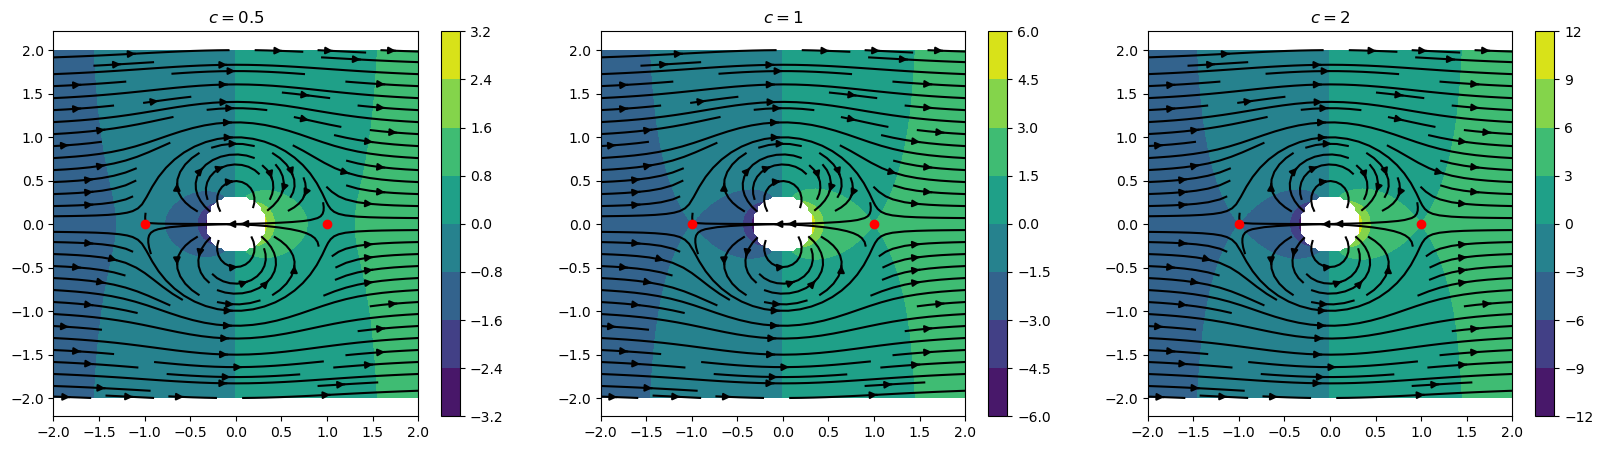

In [14]:
# plot stagnation points over previous figure
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1, 3)

ax1 = fig.add_subplot(gs[0, 0])
cmap = ax1.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],Phi_c05[:,:,ind_z0])
fig.colorbar(cmap)
ax1.streamplot(XX[:,:,ind_z0],YY[:,:,ind_z0],u05,v05,color='k');
ax1.plot(stag1_c05[0],stag1_c05[1],'ro')
ax1.plot(stag2_c05[0],stag2_c05[1],'ro')
plt.title('$c=0.5$')

ax2 = fig.add_subplot(gs[0, 1])
cmap = ax2.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],Phi_c1[:,:,ind_z0])
fig.colorbar(cmap)
ax2.streamplot(XX[:,:,ind_z0],YY[:,:,ind_z0],u1,v1,color='k');
ax2.plot(stag1_c1[0],stag1_c1[1],'ro')
ax2.plot(stag2_c1[0],stag2_c1[1],'ro')
plt.title('$c=1$')

ax3 = fig.add_subplot(gs[0, 2])
cmap = ax3.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],Phi_c2[:,:,ind_z0])
fig.colorbar(cmap)
ax3.streamplot(XX[:,:,ind_z0],YY[:,:,ind_z0],u2,v2,color='k');
ax3.plot(stag1_c2[0],stag1_c2[1],'ro')
ax3.plot(stag2_c2[0],stag2_c2[1],'ro')
plt.title('$c=2$')

plt.show()

## Part four: Pressure

The pressure in the system is given by
$$ p = p_\infty +\frac{1}{2}\rho(c^2-||\mathbf{u}||^2). $$

In [15]:
# set constant parameters
pinf = 101.325
rho = 1.2

In [16]:
def pressure(r,c):
    p = pinf + 1/2*rho*(c**2-np.linalg.norm(velocity([XX,YY,ZZ],c),axis=0)**2)
    return p

In [17]:
P_c05 = pressure([XX,YY,ZZ],0.5)
P_c1 = pressure([XX,YY,ZZ],1)
P_c2 = pressure([XX,YY,ZZ],2)

C:\Users\quinncr\AppData\Local\Temp\ipykernel_28332\725010879.py:6: RuntimeWarning: divide by zero encountered in divide
  u = c + c/(2*(x**2+y**2+z**2)**(3/2)) - 3/2*(c*x**2)/(x**2+y**2+z**2)**(5/2)
C:\Users\quinncr\AppData\Local\Temp\ipykernel_28332\725010879.py:6: RuntimeWarning: invalid value encountered in divide
  u = c + c/(2*(x**2+y**2+z**2)**(3/2)) - 3/2*(c*x**2)/(x**2+y**2+z**2)**(5/2)
C:\Users\quinncr\AppData\Local\Temp\ipykernel_28332\725010879.py:7: RuntimeWarning: invalid value encountered in divide
  v = -3/2*(c*x*y)/(x**2+y**2+z**2)**(5/2)
C:\Users\quinncr\AppData\Local\Temp\ipykernel_28332\725010879.py:8: RuntimeWarning: invalid value encountered in divide
  w = -3/2*(c*x*z)/(x**2+y**2+z**2)**(5/2)


In [18]:
# mask out sphere body
for ii in np.arange(0,xs.shape[0]):
    for jj in np.arange(0,ys.shape[0]):
        for kk in np.arange(0,zs.shape[0]):
            if xs[ii]**2+ys[jj]**2+zs[kk]**2<1:
                P_c05[jj,ii,kk] = np.NaN
                P_c1[jj,ii,kk] = np.NaN
                P_c2[jj,ii,kk] = np.NaN

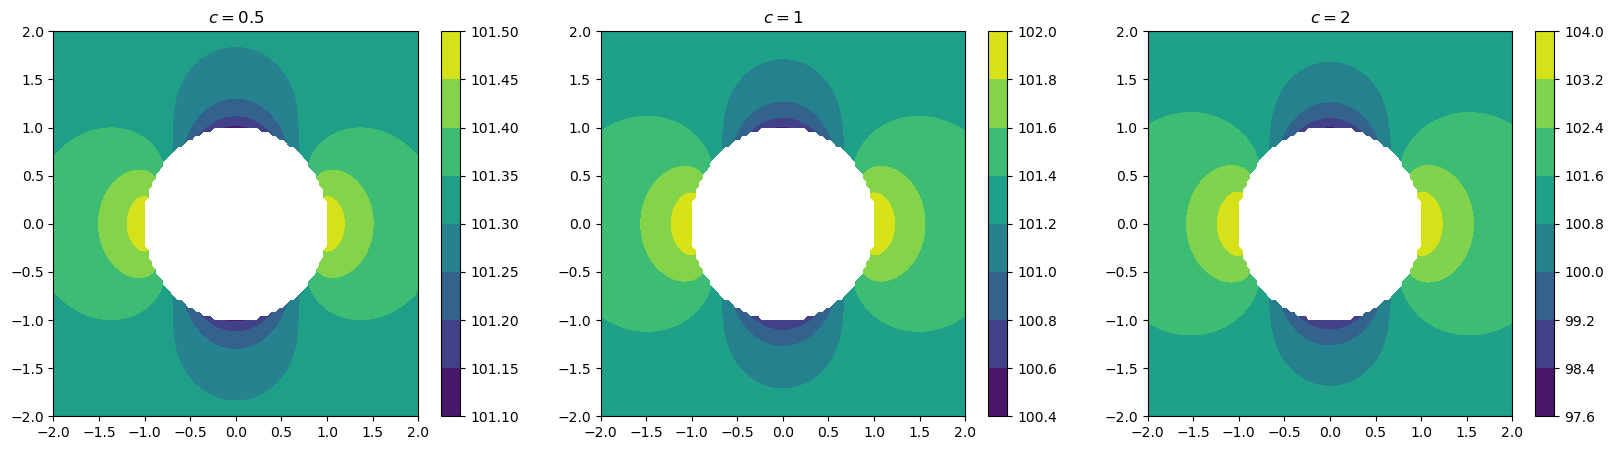

In [19]:
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1, 3)

ax1 = fig.add_subplot(gs[0, 0])
cmap = ax1.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],P_c05[:,:,ind_z0])
fig.colorbar(cmap)
plt.title('$c=0.5$')

ax2 = fig.add_subplot(gs[0, 1])
cmap = ax2.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],P_c1[:,:,ind_z0])
fig.colorbar(cmap)
plt.title('$c=1$')

ax3 = fig.add_subplot(gs[0, 2])
cmap = ax3.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],P_c2[:,:,ind_z0])
fig.colorbar(cmap)
plt.title('$c=2$')

plt.show()

The pressure increases near the surface of the sphere on the $x$-axis as uniform flow rate $c$ increases.

Compare to $||\mathbf{u}||^2$:

In [20]:
unorm_c05 = np.linalg.norm(velocity([XX,YY,ZZ],0.5),axis=0)
unorm_c1 = np.linalg.norm(velocity([XX,YY,ZZ],1),axis=0)
unorm_c2 = np.linalg.norm(velocity([XX,YY,ZZ],2),axis=0)

# mask out sphere
for ii in np.arange(0,xs.shape[0]):
    for jj in np.arange(0,ys.shape[0]):
        for kk in np.arange(0,zs.shape[0]):
            if xs[ii]**2+ys[jj]**2+zs[kk]**2<1:
                unorm_c05[jj,ii,kk] = np.NaN
                unorm_c1[jj,ii,kk] = np.NaN
                unorm_c2[jj,ii,kk] = np.NaN

C:\Users\quinncr\AppData\Local\Temp\ipykernel_28332\725010879.py:6: RuntimeWarning: divide by zero encountered in divide
  u = c + c/(2*(x**2+y**2+z**2)**(3/2)) - 3/2*(c*x**2)/(x**2+y**2+z**2)**(5/2)
C:\Users\quinncr\AppData\Local\Temp\ipykernel_28332\725010879.py:6: RuntimeWarning: invalid value encountered in divide
  u = c + c/(2*(x**2+y**2+z**2)**(3/2)) - 3/2*(c*x**2)/(x**2+y**2+z**2)**(5/2)
C:\Users\quinncr\AppData\Local\Temp\ipykernel_28332\725010879.py:7: RuntimeWarning: invalid value encountered in divide
  v = -3/2*(c*x*y)/(x**2+y**2+z**2)**(5/2)
C:\Users\quinncr\AppData\Local\Temp\ipykernel_28332\725010879.py:8: RuntimeWarning: invalid value encountered in divide
  w = -3/2*(c*x*z)/(x**2+y**2+z**2)**(5/2)


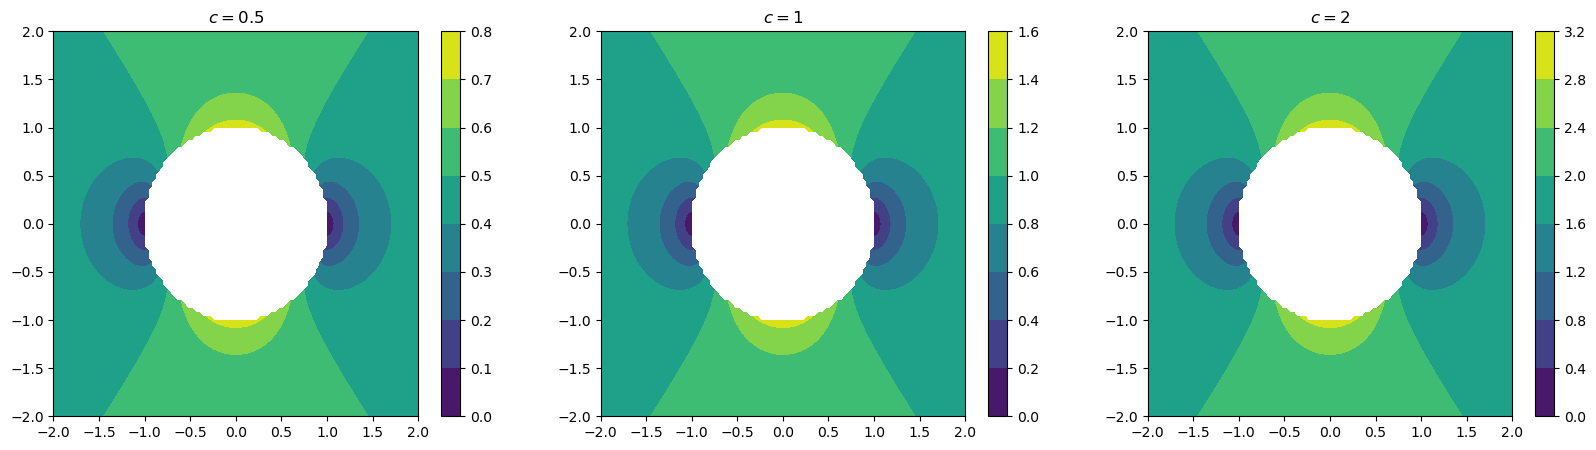

In [21]:
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1, 3)

ax1 = fig.add_subplot(gs[0, 0])
cmap = ax1.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],unorm_c05[:,:,ind_z0])
fig.colorbar(cmap)
plt.title('$c=0.5$')

ax2 = fig.add_subplot(gs[0, 1])
cmap = ax2.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],unorm_c1[:,:,ind_z0])
fig.colorbar(cmap)
plt.title('$c=1$')

ax3 = fig.add_subplot(gs[0, 2])
cmap = ax3.contourf(XX[:,:,ind_z0],YY[:,:,ind_z0],unorm_c2[:,:,ind_z0])
fig.colorbar(cmap)
plt.title('$c=2$')

plt.show()

We see that $||\mathbf{u}||^2$ is negatively proportional to $p$.